In [ ]:
!pip install kmapper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 31.6 MB/s 


In [ ]:
# from kmapper import jupyter
import kmapper as km
from kmapper import Cover, jupyter
import numpy as np

from sklearn.datasets import fetch_20newsgroups
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import Isomap
from sklearn.preprocessing import MinMaxScaler

In [ ]:
fetch_20newsgroups

<function sklearn.datasets._twenty_newsgroups.fetch_20newsgroups(*, data_home=None, subset='train', categories=None, shuffle=True, random_state=42, remove=(), download_if_missing=True, return_X_y=False)>

In [ ]:
newsgroups = fetch_20newsgroups(subset='train')
X, y, target_names = np.array(newsgroups.data), np.array(newsgroups.target), np.array(newsgroups.target_names)
print("SAMPLE",X[0])
print("SHAPE",X.shape)
print("TARGET",target_names[y[:5]])

SAMPLE From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





SHAPE (11314,)
TARGET ['rec.autos' 'comp.sys.mac.hardware' 'comp.sys.mac.hardware'
 'comp.graphics' 'sci.space']


In [ ]:
y[:5]

array([ 7,  4,  4,  1, 14])

In [ ]:
vectorizer = TfidfVectorizer(analyzer="char",
                                ngram_range=(1,6),
                                max_df=0.83,
                                min_df=0.05)
vec_X = vectorizer.fit_transform(X)

In [ ]:
intevec_X.shape

(11314, 13967)

In [ ]:
truncated = TruncatedSVD(n_components=100,
                             random_state=1729)
trunc_X = truncated.fit_transform(vec_X)

In [ ]:
trunc_X.shape

(11314, 100)

In [ ]:
isomap = Isomap(n_components=2,
                       n_jobs=-1)
iso_X = isomap.fit_transform(trunc_X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [ ]:
iso_X.shape

(11314, 2)

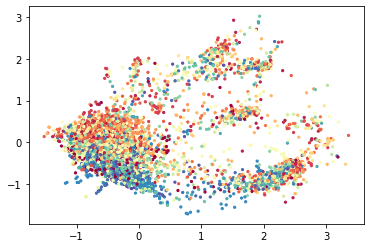

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(iso_X[:, 0], iso_X[:, 1], c=y, s=5, cmap='Spectral');

In [ ]:
mapper = km.KeplerMapper(verbose=4)

#projected_X = mapper.fit_transform(iso_X)
projected_X = iso_X

print("SHAPE",projected_X.shape)

KeplerMapper(verbose=4)
SHAPE (11314, 2)


In [ ]:
from sklearn import cluster
graph = mapper.map(projected_X,
                   X=None,
                   clusterer=cluster.AgglomerativeClustering(n_clusters=3,
                                                             linkage="complete",
                                                             affinity="cosine"),
                   cover=Cover(perc_overlap=0.33))

Mapping on data shaped (11314, 2) using lens shaped (11314, 2)

Minimal points in hypercube before clustering: 3
Creating 100 hypercubes.
   > Found 3 clusters in hypercube 0.
   > Found 3 clusters in hypercube 1.
   > Found 3 clusters in hypercube 2.
   > Found 3 clusters in hypercube 3.
Cube_4 is empty.

   > Found 3 clusters in hypercube 5.
   > Found 3 clusters in hypercube 6.
   > Found 3 clusters in hypercube 7.
   > Found 3 clusters in hypercube 8.
   > Found 3 clusters in hypercube 9.
   > Found 3 clusters in hypercube 10.
   > Found 3 clusters in hypercube 11.
   > Found 3 clusters in hypercube 12.
   > Found 3 clusters in hypercube 13.
   > Found 3 clusters in hypercube 14.
   > Found 3 clusters in hypercube 15.
   > Found 3 clusters in hypercube 16.
   > Found 3 clusters in hypercube 17.
   > Found 3 clusters in hypercube 18.
   > Found 3 clusters in hypercube 19.
   > Found 3 clusters in hypercube 20.
   > Found 3 clusters in hypercube 21.
   > Found 3 clusters in hypercube

In [ ]:
vec = TfidfVectorizer(analyzer="word",
                      strip_accents="unicode",
                      stop_words="english",
                      ngram_range=(1,3),
                      max_df=0.97,
                      min_df=0.02)

interpretable_inverse_X = vec.fit_transform(X).toarray()
interpretable_inverse_X_names = vec.get_feature_names()

print("SHAPE", interpretable_inverse_X.shape)
print("FEATURE NAMES SAMPLE", interpretable_inverse_X_names[:400])

SHAPE (11314, 947)
FEATURE NAMES SAMPLE ['00', '000', '10', '100', '11', '12', '13', '14', '15', '16', '17', '18', '19', '1992', '1993', '1993apr15', '20', '200', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '408', '41', '42', '43', '44', '45', '49', '50', '500', '60', '70', '80', '90', '92', '93', 'able', 'ac', 'ac uk', 'accept', 'access', 'according', 'acs', 'act', 'action', 'actually', 'add', 'address', 'advance', 'advice', 'ago', 'agree', 'air', 'al', 'allow', 'allowed', 'america', 'american', 'andrew', 'answer', 'anti', 'anybody', 'apparently', 'appears', 'apple', 'application', 'apply', 'appreciate', 'appreciated', 'apr', 'apr 1993', 'apr 93', 'april', 'area', 'aren', 'argument', 'article', 'article 1993apr15', 'ask', 'asked', 'asking', 'assume', 'att', 'att com', 'au', 'available', 'average', 'avoid', 'away', 'bad', 'base', 'baseball', 'based', 'basic', 'basically', 'basis', 'bbs', 'believe', 'best', 'bet

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
type(interpretable_inverse_X)

numpy.ndarray

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
_ = mapper.visualize(graph,
                        X=interpretable_inverse_X,
                        X_names=interpretable_inverse_X_names,
                       # path_html=r"C:\Users\madha\output\newsgroups20.html",
                        path_html=r"C:\Users\madha\output\newsgroups20.html",
                        lens=projected_X,
                        lens_names=["ISOMAP1", "ISOMAP2"],
                        title="Newsgroups20: Latent Semantic Char-gram Analysis with Isometric Embedding",
                        custom_tooltips=np.array([target_names[ys] for ys in y]),
                        color_values=y,
                        color_function_name='target')



Wrote visualization to: C:\Users\madha\output\newsgroups20.html


In [ ]:
jupyter.display(r"C:\Users\madha\output\newsgroups20.html")

In [ ]:
# TDA analysis

In [ ]:
# Import the class
import kmapper as km

# Some sample data
from sklearn import datasets
data, labels = datasets.make_circles(n_samples=5000, noise=0.03, factor=0.3)

# Initialize
mapper = km.KeplerMapper(verbose=1)

# Fit to and transform the data
projected_data = mapper.fit_transform(data, projection=[0,1]) # X-Y axis

# Create dictionary called 'graph' with nodes, edges and meta-information
graph = mapper.map(projected_data, data, cover=km.Cover(n_cubes=10))

# Visualize it
mapper.visualize(graph, path_html=r'/content/drive/MyDrive/circles.html',
                 title="make_circles(n_samples=5000, noise=0.03, factor=0.3)")

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (5000, 2)

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler()

Mapping on data shaped (5000, 2) using lens shaped (5000, 2)

Creating 100 hypercubes.

Created 249 edges and 95 nodes in 0:00:00.320443.
Wrote visualization to: /content/drive/MyDrive/circles.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>make_circles(n_samples=5000, noise=0.03, factor=0.3) | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\